In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('/content/drive/MyDrive/disease datasets/final_data.csv')

In [3]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [4]:
data

,len,cancer,seq
0,399,0,"['atgctg', 'tgctga', 'gctgag', 'ctgagc', 'tgag..."
1,2175,0,"['atgctg', 'tgctga', 'gctgat', 'ctgatg', 'tgat..."
2,1635,0,"['atggtg', 'tggtgg', 'ggtggc', 'gtggct', 'tggc..."
3,1020,0,"['atggtg', 'tggtgg', 'ggtggc', 'gtggct', 'tggc..."
4,1044,0,"['atggtg', 'tggtgg', 'ggtggc', 'gtggct', 'tggc..."
...,...,...,...
1195,1356,3,"['atgaaa', 'tgaaag', 'gaaaga', 'aaagac', 'aaga..."
1196,786,3,"['atgggg', 'tggggc', 'ggggcg', 'gggcgg', 'ggcg..."
1197,1068,3,"['atgaaa', 'tgaaac', 'gaaacc', 'aaacca', 'aacc..."
1198,699,3,"['gtgatt', 'tgatta', 'gattag', 'attagt', 'ttag..."


In [5]:
y = data.iloc[:, 1].values
y

array([0, 0, 0, ..., 3, 3, 3])

In [6]:
x = data.iloc[:, 2].values
x

array(["['atgctg', 'tgctga', 'gctgag', 'ctgagc', 'tgagcg', 'gagcga', 'agcgac', 'gcgaca', 'cgacat', 'gacatg', 'acatgg', 'catgga', 'atggac', 'tggact', 'ggactt', 'gacttt', 'acttta', 'ctttag', 'tttaga', 'ttagag', 'tagagt', 'agagtc', 'gagtca', 'agtcaa', 'gtcaaa', 'tcaaag', 'caaaga', 'aaagaa', 'aagaag', 'agaaga', 'gaagat', 'aagatg', 'agatgg', 'gatggc', 'atggcc', 'tggcca', 'ggccac', 'gccacg', 'ccacgg', 'cacgga', 'acggag', 'cggaga', 'ggagac', 'gagaca', 'agacag', 'gacagc', 'acagca', 'cagcag', 'agcagc', 'gcagcg', 'cagcgt', 'agcgtg', 'gcgtgg', 'cgtggt', 'gtggtc', 'tggtca', 'ggtcag', 'gtcaga', 'tcagag', 'cagagt', 'agagtg', 'gagtgg', 'agtggt', 'gtggta', 'tggtag', 'ggtagg', 'gtagga', 'taggag', 'aggagc', 'ggagcc', 'gagccg', 'agccgg', 'gccggc', 'ccggcc', 'cggcca', 'ggccat', 'gccatc', 'ccatca', 'catcag', 'atcagc', 'tcagcg', 'cagcga', 'agcgag', 'gcgaga', 'cgagag', 'gagagc', 'agagct', 'gagctg', 'agctgc', 'gctgct', 'ctgctc', 'tgctcc', 'gctcca', 'ctccat', 'tccatg', 'ccatgc', 'catgcc', 'atgcct', 'tgcctg', '

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(x)

In [8]:
x = x.toarray()
type(x)

numpy.ndarray

In [9]:
print(x.shape)

(1200, 230368)


In [10]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

In [12]:
model = Sequential([
                              keras.layers.Dense(200 , activation = 'relu'),
                              keras.layers.Dense(100 , activation = 'softmax'),
                              keras.layers.Dense(4 , activation = 'softmax')
      ])

In [13]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

In [14]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32,epochs=10, verbose=1)

Epoch 1/10
30/30 [==============================] - 7s 99ms/step - loss: 1.2783 - accuracy: 0.6365 - val_loss: 1.2003 - val_accuracy: 0.9208
Epoch 2/10
30/30 [==============================] - 3s 102ms/step - loss: 1.1468 - accuracy: 0.9854 - val_loss: 1.1636 - val_accuracy: 0.8375
Epoch 3/10
30/30 [==============================] - 3s 92ms/step - loss: 1.0885 - accuracy: 0.9927 - val_loss: 1.1311 - val_accuracy: 0.8208
Epoch 4/10
30/30 [==============================] - 2s 61ms/step - loss: 1.0436 - accuracy: 0.9937 - val_loss: 1.1090 - val_accuracy: 0.8083
Epoch 5/10
30/30 [==============================] - 2s 61ms/step - loss: 1.0016 - accuracy: 0.9969 - val_loss: 1.0887 - val_accuracy: 0.7958
Epoch 6/10
30/30 [==============================] - 2s 69ms/step - loss: 0.9634 - accuracy: 0.9969 - val_loss: 1.0479 - val_accuracy: 0.8208
Epoch 7/10
30/30 [==============================] - 2s 60ms/step - loss: 0.9270 - accuracy: 0.9969 - val_loss: 1.0221 - val_accuracy: 0.8208
Epoch 8/10
3

In [15]:
predictions = model.predict(x_test)
accuracy = model.evaluate(x_test, y_test, verbose=0)

8/8 [==============================] - 0s 35ms/step


In [23]:
import joblib

In [30]:
model.save('/content/drive/MyDrive/models/model.keras')

In [16]:
y_predicted = model.predict(x_test)
y_predicted[6]

8/8 [==============================] - 0s 33ms/step


array([0.45211414, 0.17653862, 0.19120196, 0.1801453 ], dtype=float32)

In [17]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[0, 1, 0, 0, 2]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[49,  0,  0,  0],
       [ 0, 61,  0,  0],
       [ 0,  5, 58,  0],
       [ 0,  0,  0, 67]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

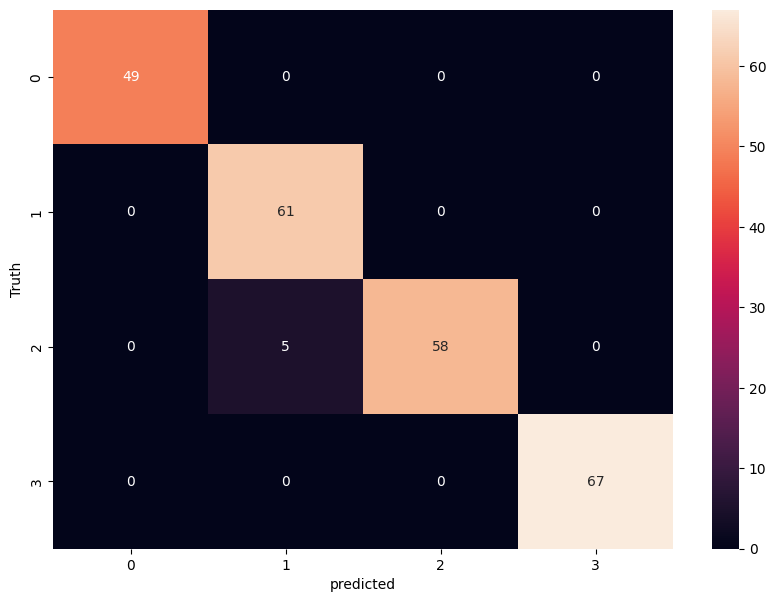

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [20]:
target_names = ['Cervical Cancer', 'Colorectal Cancer', 'Endometrial Cancer','Liver Cancer']
cr = classification_report(y_test , y_predicted_label, target_names=target_names)

In [21]:
print(cr)

                    precision    recall  f1-score   support

   Cervical Cancer       1.00      1.00      1.00        49
 Colorectal Cancer       0.92      1.00      0.96        61
Endometrial Cancer       1.00      0.92      0.96        63
      Liver Cancer       1.00      1.00      1.00        67

          accuracy                           0.98       240
         macro avg       0.98      0.98      0.98       240
      weighted avg       0.98      0.98      0.98       240



In [25]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [26]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
